*There are no recommended prerequisites for this notebook.*

In [16]:
# package imports (SHIFT + ENTER to run)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from typing import Union, Optional

# dev note : needs proofreading
# dev note : reference re: rogue worlds comment (ask Scott)

# Exoplanets and brown dwarfs

This notebook is **part 2** in an introductory bundle, intended to be covered in series. But, as always, I am not your boss; you can cover this material in whatever order you like. Or not at all. It is your adventure to navigate. To recap though, the contents of this introduction are as follows:

<h3>Contents</h3>

- [What is microlensing?](Introduction.ipynb#what-is-microlensing) ([part 1](Introduction.ipynb))

- [What is it used for?](Introduction.ipynb#what-is-it-used-for)

  - [Exoplanets](#exoplanets) (part 2)

  - [Brown dwarfs](#brown-dwarfs)

  - [Black holes and other remnants](PlanetsAndBrownDwarfs.ipynb#black-holes-and-other-remnants) ([part 3](PlanetsAndBrownDwarfs.ipynb))

  - [Dark matter](RemnantsAndDarkMatter.ipynb#dark-matter)

  - [The Macho project](RemnantsAndDarkMatter.ipynb#the-macho-project)
  
- [Microlensing eras (part 4)](Era.ipynb)

  - [Past](Era.ipynb)

  - [Present](Era.ipynb)
  
  - [Future](Era.ipynb)


In this notebook we explore some of motivations for exoplanet and brown dwarf studies with microlensing and some of the key discoveries, to date. It is meant to get you caught up on the sate of the feild without the tedious task of extensive literature review. Even if your area of research is not exoplanets or brown dwarfs, exoplanets are such are large part of microlensing, and motivate so many observing strategy decisions, that it is worth at least touching on this topic, to give the rest of the field some context. 

Let's get started!

## Exoplanets

The search for, and characterisation of [exoplanets](https://en.wikipedia.org/wiki/Exoplanet), is probably the most popularly understood science goal in microlensing. Although it is not the technique that finds the most exoplanets, it is sensitive to members of planetary populations that other methods are not so sensitive to.

We can use this notebook to understand the different sensitivities of each method, by loading the mass and semi-major axis for every discovered exoplanet from the Nasa Exoplanet Archive, using *astroquery*.


In [8]:
# Fetch data from NASA Exoplanet Archive using astroquery
query = NasaExoplanetArchive.query_criteria(table="ps", select="pl_name,pl_bmassj,pl_orbsmax,discoverymethod")
exoplanet_df = query.to_pandas()

# Filter out rows with missing values
exoplanet_df_clean = exoplanet_df.dropna(subset=['pl_bmassj', 'pl_orbsmax']).copy()

# Convert mass from Jupiter masses to Earth masses (1 Jupiter mass = 317.8 Earth masses)
exoplanet_df_clean.loc[:, 'pl_bmasse'] = exoplanet_df_clean['pl_bmassj'] * 317.8

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/PlanetsE1.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 1</h2>
    </a>
    <p style="margin: 0 20px;">Use the information from the table to draw the solar system planets onto the plot of exoplanet mass vs semi-major axis, in the cell below.</p>
    <br>
</div>

| Planet       | Mass (Earth Masses) | Semi-Major Axis (AU) |
|--------------|---------------------|----------------------|
| Mercury      | 0.055               | 0.387                |
| Venus        | 0.815               | 0.723                |
| Earth        | 1.000               | 1.000                |
| Mars         | 0.107               | 1.524                |
| Jupiter      | 317.8               | 5.204                |
| Saturn       | 95.2                | 9.583                |
| Uranus       | 14.5                | 19.22                |
| Neptune      | 17.1                | 30.05                |

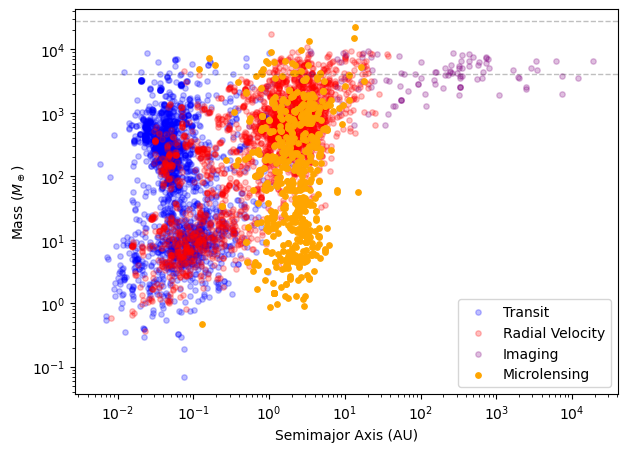

<Figure size 640x480 with 0 Axes>

In [9]:
# Plotting
plt.close(4)
plt.figure(num=4, figsize=(7, 5))

# Define colors for different discovery methods
colors = {
    'Transit': 'blue',
    'Radial Velocity': 'red',
    'Imaging': 'purple',
    'Microlensing': 'orange'
}

# Plot each discovery method with different colors
for method, color in colors.items():
    subset = exoplanet_df_clean[exoplanet_df_clean['discoverymethod'] == method]
    if method == 'Microlensing':
        a = 1.0
    else:
        a = 0.25
    plt.scatter(subset['pl_orbsmax'], subset['pl_bmasse'], c=color, label=method, alpha=a, s=15)

# Planet images
Mercury_png = './Assets/Planets/Mercury.png'
Venus_png = './Assets/Planets/Venus.png'
Earth_png = './Assets/Planets/Earth.png'
Mars_png = './Assets/Planets/Mars.png'
Jupiter_png = './Assets/Planets/Jupiter.png'
Saturn_png = './Assets/Planets/Saturn.png'
Uranus_png = './Assets/Planets/Uranus.png'
Neptune_png = './Assets/Planets/Neptune.png'

# Log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Plot a horizontal line at 13 Jupiter masses (13 * 317.8 Earth masses)
BD = 13 * 317.8  # BD = 13 Jupiter masses in Earth masses
plt.axhline(y=BD, color='black', linestyle='--', linewidth=1, alpha=0.25)
BD = 90 * 317.8  # BD = 13 Jupiter masses in Earth masses
plt.axhline(y=BD, color='black', linestyle='--', linewidth=1, alpha=0.25)

# Labels and title
plt.xlabel(r'Semimajor Axis (AU)')
plt.ylabel(r'Mass ($M_\oplus$)')
plt.legend(loc='lower right')

######################
# Your code goes here

######################

# Show plot
plt.show()

plt.savefig('./Products/exoplanet_plot.png', dpi=300)

The direct imaging method is most sensitive to wider orbit planets. Technology creates a limit as to how close and low mass the planets this method detects can be.

Detection methods such as radial velocity (RV)<sup>\*<sub>1</sub></sup> and transit<sup>\*<sub>2</sub></sup> surveys are far more sensitive to high-mass-ratio, small-orbit companions as they produce more significant and frequent/short-period transit and RV signals.  Because these methods rely on light from the host, they are most sensitive to nearby and/or bright hosts. There is a diagonal break in the above plot that demonstrates parameter space where these methods lose sensitivity.

> <sup>\*<sub>1</sub></sup> The <i>RV</i> exoplanet detection method uses time-series, Doppler measurements of a host star to identify the co-orbital "wiggle" caused by a planetary companion.

> <sup>\*<sub>2</sub></sup> The <i>transit</i> method for detecting exoplanets requires a line-of-sight alignment between the exoplanet and its host star.  The exoplanet blocks some of the light from the host-star and causes a characteristic "U" shaped dip in the host star's lightcurve.

The microlensing detection rate is not dependent on orbital frequency; the events are stochastic and unique. It is the projected separation, $s$, at the time of the event that is influential in its detection, not the orbital period. The microlensing method is most sensitive to a projected separation of lens-masses of around $1\,r_E$; peak sensitivity with this method is beyond the snow line<sup>\*<sub>3</sub></sup> (see, for example, [Gaudi 2012](https://ui.adsabs.harvard.edu/abs/2012ARA&A..50..411G)). Unreliant on light from the host, microlensing is unique in its ability to unveil exoplanets that are located at considerable distances from us and around a wide variety of host stars. Technology and observing stratergies create limits on how low mass and far from the Einstein ring these planets can be. See the Optical depth section, in the [Simulations](Simulations.ipynb) notebook (in preperation), for more on microlensing detection efficiency. 

> <sup>\*<sub>3</sub></sup> The <i>snow line is the orbital radius, about a star, at which water ice sublimates.</i>

The different sensitivities of the microlensing and direct imaging methods help us to understand the dominating role the detection sensitivites are having on current populating of this plot. There is still a large area of this plot for which our current detection methods are insensitive. This is emphasised by the location of solar-system planets, which are largely outside of current sensitivty regions. If we assume that the solar-system is a somewhat typical planetary system then it seems we are not sensitive to what should be the most densly populated regions of this parameter space.

With its broad detection sensitivities, microlensing has expanded our understanding of planetary systems through reduced biases in population studies. The deterministic inference of planet population distributions from microlensing is proposed in [Dominik et al. (2010)](https://primo.lclark.edu/discovery/fulldisplay?docid=cdi_liege_orbi_v2_oai_orbi_ulg_ac_be_2268_65643&context=PC&vid=01ALLIANCE_LCC:LCC&lang=en&search_scope=EVERYTHING&adaptor=Primo%20Central&tab=Everything&query=creator,equals,%20Zub,%20M.,AND&mode=advanced&offset=0). This idea was applied in practice in [Cassan et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012Natur.481..167C), (described in further detail in their [thesis](https://ui.adsabs.harvard.edu/abs/2014MsT..........2C)) using photometry from the Probing Lensing Anomalies NETwork (PLANET; [Albrow et al. 1998](https://ui.adsabs.harvard.edu/abs/1998ApJ...509..687A)) and presenting the well-known conclusion: 
   
<h5> <ul> <i>"One or more bound planets per Milky Way star."</i> </ul> </h5>

A more detailed study of bound planetary statistics, using microlensing, was performed on the MOA (Microlensing Observations in Astrophysics; [Sako et al. (2008)](https://ui.adsabs.harvard.edu/abs/2008ExA....22...51S)) survey data and presented in [Suzuki et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...833..145S). They found a broken-power-law mass-ratio function best described the empirical data. This broken power-law was significantly favoured over the unbroken power-law and the break was at $q_{br} = 1.7\times10^{-4}$. Their broken power-law mass-ratio function is shown in their Figure 13, which also displays the [Cassan et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012Natur.481..167C), power-law mass-ratio function. These findings disagree with the [core-accretion](https://faculty.ucr.edu/~krice/coreacc.html) planet-formation theory [(Pollack et al., 1996)](https://ui.adsabs.harvard.edu/abs/1996Icar..124...62P), particularly in the number of failed gas-giant cores.

A sample of planetary microlensing events can, in theory, be used to determine how the number of planets per star changes with Galactic position. [Penny et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...830..150P) pioneered these investigations, but with results that were highly dependent on a small number of parallax measurements ($\pi_{\rm E}$), mostly from ground-only sources, which have biases towards high-parallaxes and long-timescales<sup>*<sub>4</sub></sup> (and thus lower relative proper motions). This relative proper motion bias is very obvious in their Figure 3, where most samples clump down the low-proper-motion end of the distribution. 

> <sup>*<sub>4</sub></sup>The <i>timescale</i> refers to the "duration" of an event. However, defining the beginning and end of a microlensing event is a nebulous concept, so we instead refer to the Einstein time, $t_{\rm E}$, of an event as its timescale. $t_{\rm E}$ is defined as the time it takes for a source (projected onto the lens plane and in the reference frame where the lens is at rest) to traverse an Einstein ring radius.

The likely combination of these two biases is that, the high parallax favours close lenses, and the low proper motion bias favours sources from the same kinematic sample (i.e., a disk lens favours a disk source). Of the two high proper-motion events for which mass was measured, one (MOA-2013-BLG-220) was not measured using parallax and is therefore not subject to the same biases. The other, OGLE-2013-BLG-0341, belongs to a rare class of very-low-$q$ events (as modelled in [Jung et al., 2019](https://ui.adsabs.harvard.edu/abs/2019AJ....157...72J)) with planetary caustic<sup>*<sub>5</sub></sup> crossings that were observed purely because of the high fidelity imaging of the first generation of microlensing. This is not a sensitivity that is seen in the survey-dominated generation's data ([Gould et al., 2020](https://ui.adsabs.harvard.edu/abs/2020JKAS...53....9G)). All evidence points towards a poor understanding of microlensing's sensitivity at very-low-$q$ (approximately sub-Neptune planetary mass), especially in the specific context of different strategies. 

> <sup>*<sub>5</sub></sup> <i>Planetary caustics</i> are small features in the source plane of planetary events, that correspond to the alignments of highest magnification. 
> See the [Binary Lens](BinaryLens.ipynb) notebook for more on caustics.
> See the section on [Microlensing Eras](#3-microlensing-eras) for a detailed description of microlensing generations and their distinct observational methods.
> The contributions of this generation to the very-low-$q$ regime detections involve central or resonant caustic crossings, which are of larger relative size and are more predictable in occurrence than planetary caustic crossings.

The results of [Penny at al. (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...830..150P) are subject to too many unmitigated biases and incorrectly classified events (e.g., OGLE-2013-BLG-0723; [Albrow et al., 2000](https://ui.adsabs.harvard.edu/abs/2000ApJ...534..894A) [Jung et al., 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...768L...7J)) to be able to put much faith in their tentative proposal that disk stars are more likely to host planets than bulge stars.<sup>*<sub>6</sub></sup> Instead what we learn is that ground-based parallax measurements have a strong bias towards close, low-proper-motion lenses and that Bayesian lens distance estimates appear to under-predict bulge lenses and lenses with very small distances from the Sun.

> <sup>*<sub>6</sub></sup> The "bulge" refers to the population of old, kinematically-hot stars around the Galactic centre at radii of $R\lesssim4\,\rm{kpc}$. The "disk" is the younger population of stars that co-rotates in a disk around the Galactic centre and extends to $R\lesssim15\,\rm{kpc}$. 
> See the [Galactic Model](GalacticModel.ipynb) for more on Galactic structure.

[Koshimoto et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...918L...8K) performed a very different analysis on essentially the same set of events. Their analysis was also concerned with a radial dependence on planet hosting but was centred on the use of microlensing parameter rather than parameters that are inferred or determined through the higher-order effects, which are subject to more complicated sensitivities. They found that a star's probability of hosting planets may have a small dependence on the galactic radius of the system, and that the bulge does host planets.

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/PlanetsE2.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 2</h2>
    </a>
    <p style="margin: 0 20px;">We have created a histogram of distance from the Sun of the <i>current</i> catalogue of microlensing exoplanets. How does this compare with expectations from Penny et al. (2016)?</p>
    <br>
</div>

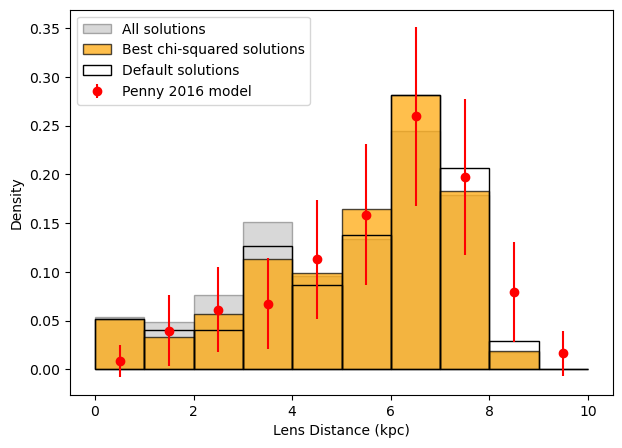

In [10]:
# Fetch data from the ML table in NASA Exoplanet Archive using astroquery
query = NasaExoplanetArchive.query_criteria(table="ML", select="pl_name,sy_dist,ml_modeldef,ml_modelchisq")
ML_df = query.to_pandas()

# Filter out rows with missing values and create a copy of the DataFrame
microlensing_df_clean = ML_df.dropna(subset=['sy_dist', 'ml_modelchisq']).copy()

# Convert distances from parsecs to kiloparsecs
microlensing_df_clean['sy_dist_kpc'] = microlensing_df_clean['sy_dist'] / 1000.0

# Identify the degenerate solutions with the lowest ml_modelchisq for each pl_name
microlensing_df_best_chisq = microlensing_df_clean.loc[microlensing_df_clean.groupby('pl_name')['ml_modelchisq'].idxmin()]

# Filter for entries with ml_modeldef = 1
microlensing_df_default = microlensing_df_clean[microlensing_df_clean['ml_modeldef'] == 1]

# Calculate histograms
bins = np.linspace(0, 10, 11)
all_hist, _ = np.histogram(microlensing_df_clean['sy_dist_kpc'], bins=bins, density=True)
best_chisq_hist, _ = np.histogram(microlensing_df_best_chisq['sy_dist_kpc'], bins=bins, density=True)
default_hist, _ = np.histogram(microlensing_df_default['sy_dist_kpc'], bins=bins, density=True)

# Plotting the histograms
plt.close(5)
plt.figure(num=5, figsize=(7, 5))
plt.hist(microlensing_df_clean['sy_dist_kpc'], bins=bins, color='grey', edgecolor='black', alpha=0.3, density=True, label='All solutions')
plt.hist(microlensing_df_best_chisq['sy_dist_kpc'], bins=bins, color='orange', edgecolor='black', alpha=0.7, density=True, label='Best chi-squared solutions')
plt.hist(microlensing_df_default['sy_dist_kpc'], bins=bins, facecolor='none', edgecolor='black', alpha=1.0, density=True, label='Default solutions')

# Adding Penny Errorbars
penny_model_df = pd.read_csv('Data/Penny2016F1-model.csv', header=0, skipinitialspace=True)
normalise = penny_model_df['f'].sum()
plt.errorbar(penny_model_df['D_L'], penny_model_df['f']/normalise, yerr=penny_model_df['f_err']/normalise, fmt='o', color='red', label='Penny 2016 model')

# Labels and title
plt.xlabel('Lens Distance (kpc)')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

# Save plot
#plt.savefig('./Products/microlensing_lens_distance_histogram.png', dpi=300)

Write you answer here.

From this plot we can see that, more often than not, the default solution and lowest $\chi^2$ solution are a more distant degenerate solution. The oversized peak in the all-solutions lens-distance distribution at 4 kpc appears to be an artefact created by degenerate solutions to common ~6 kpc lens. This artefact is mostly resolved when including only the lowest $\chi2$ solutions. 

But why are the distributions different? The large discrepancy between the $<1\,{\rm kpc}$ and $>8\,{\rm kpc}$ lens distance bins and their equivalent simulated occurrence rates is possibly indicative of simulation assumptions, or approximations, failing at those lens distances. For example, underestimating extinction could result in the simulated distribution extending further than the measured distribution. Poor asumption when estimating source distance could also easily be the culprit of the >8 kpc discrepency beween observations and predictions

> <i>For a better understanding of this topic and how we go from a microlensing event rate to population abundances, we recommend reading more on [optical depth]() and [simulations]() in microlensing (e.g., [Penny et al. 2019](https://ui.adsabs.harvard.edu/abs/2019ApJS..241....3P)), or the visit the [Simulations]() notebook (in preperation).</i>

### Free-floating planets

The microlensing method has revealed a diverse array of exoplanets, from high-$q$ gas-giants to lonely Earth-sized worlds. This diversity of systems broadens our understanding of the many ways in which stars and planets interact within our galaxy, and even speaks to the plausibility of planetary formation theories.

A prime example of this diversity is given in microlensing event OGLE-2016-BLG-1928 [Mroz et al. (2020)](http://ui.adsabs.harvard.edu/abs/2020ApJ...903L..11M). This was a single-lens event with an extremely small timescale ($t_{\rm E} = 40\,{\rm min}$); the event had a decisively planetary-mass lens without an obvious host star. This type of exoplanet is known as a free-floating planet (FFP). Its mass was estimated at a likely $0.3 \,M_\oplus$, which would make it the smallest microlensing FFP, to date. OGLE-2016-BLG-1928 is thought to have formed around a host star, having later been ejected from its birth system after a dynamical squabble with a sibling planet; i.e., through planet-planet scattering. It must be noted that, for this and all other microlensing FFPs, the possibility of the lens actually being a wide-orbit, bound planet cannot be ruled out. Instead, the general practice is to consider just how wide the planet must be from any potential bound host, at a minimum, given that the host has not been detected. For example, [Mroz et al. (2020)](http://ui.adsabs.harvard.edu/abs/2020ApJ...903L..11M) gives a lower limit on the projected host separation, for OGLE-2016-BLG-1928, of $\sim8.0\,\rm{au}$.

> <i>FFPs are often more colloquially know as "rouge planets" in scientific media.</i>

Unlike the RV, transit, and direct imaging methods, microlensing is sensitive to low-mass and/or dim hosts due to the lens-system luminosity not influencing the source-star magnification of a microlensing event. [Paczynski (1986)](http://ui.adsabs.harvard.edu/abs/1986ApJ...301..503P) proposed that microlensing could prove uniquely sensitive to FFPs that are non-local and/or no longer in their youth. This has been proven with the observations of the eight FFPs listed in the table below. While the masses given for these planets are merely estimates based on assumptions about disk or bulge membership, their characterisation as *planets* (or rather, of planet-like mass), in the broad sense, is far more certain.

| Event ID | Mass (M<sub>J</sub>) | Reference |
| :-: | :-: | :-: |
| MOA-9y-770 | ${0.07\pm0.02}$ | [Koshimoto et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023AJ....166..107K) |
| MOA-9y-5919 | ${0.002^{+0.0004}_{-0.001}}$ | [Koshimoto et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023AJ....166..107K) |
| OGLE-2016-BLG-1540 | $1.5^{+45.5}_{-1.2}$ | [Mroz et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018AJ....155..121M), [Mroz et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A&A...622A.201M) | 
|  | $2.0^{+38.0}_{-1.6}$ | [Mroz et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018AJ....155..121M), [Mroz et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A&A...622A.201M) |
| OGLE-2012-BLG-1323 | $0.04^{+0.11}_{-0.02}$ | [Mroz et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A&A...622A.201M) | 
|  | $0.09^{+0.66}_{-0.07}$ | [Mroz et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A&A...622A.201M) |
| KMT-2022-BLG-2397 | $\sim8$ | [Gould et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023AJ....166..100G) |
| OGLE-2016-BLG-1928 | $\sim0.001$ | [Mroz et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159..262M) |
| KMT-2019-BLG-2073 | $\sim0.2$ | [Kim et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021AJ....162...15K) |
| KMT-2017-BLG-2820 | | [Ryu et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021AJ....161..126R) |
| OGLE-2019-BLG-0551 | $~0.024$ | [Mroz et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159..262M) |

There are numerous other mechanisms through which FFPs are thought to come about (see the review of [Mroz and Poleski (2024)](https://arxiv.org/abs/2310.07502) and references therein). These include: 
* forming like a star through gravitational collapse, 
* failed star embryos, and 
* ejection after normal planet formation. 

The leading theories for planetary formation mechanisms are core accretion ([Pollack et al.,1996](https://ui.adsabs.harvard.edu/abs/1996Icar..124...62P)) and disk instability ([Boss, 1998](https://ui.adsabs.harvard.edu/abs/1998ApJ...503..923B)). Possible ejection processes include:
* gravitational instability in the protoplanetary disk, 
* planet-planet scattering, 
* post-main-sequence evolution processes in the host, 
* dynamical interactions in binary or multiple-star host systems, 
* stellar fly-bys, 
* or dynamical interactions within a star cluster or star-forming region. 

It is possible for very young nearby FFPs, which are yet to cool after their formation, to be directly observed. This is shown through direct-imaging observations of large, gas FFPs found in Orion ([Lucas and Roche, 2000](https://arxiv.org/abs/astro-ph/0003061)). However, limitations in age and distance mean that population inferences from direct imaging samples are heavily biased. In contrast, [Gould et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022JKAS...55..173G) demonstrated that the distribution of angular Einstein radii ($\theta_{\rm E}$) of the events observed by KMTNet is consistent with a power-law distribution of masses of FFP candidates. Furthermore, [Mroz and Poleski (2024)](https://arxiv.org/abs/2310.07502) summarised that, according to microlensing population studies (e.g., [Mroz et al., 2017](https://ui.adsabs.harvard.edu/abs/2017Natur.548..183M); [Gould et al., 2022](https://ui.adsabs.harvard.edu/abs/2022JKAS...55..173G); [Sumi et al., 2023](https://ui.adsabs.harvard.edu/abs/2023AJ....166..108S)), FFPs, if indeed unbound, may be more common than gravitationally-bound exoplanets. 

At the time of the December 2024 Rogue Worlds Conference, the most confusing part about the FFP abundances, currently predicted by microlensing, is that they appear to have more total mass than we think could have been ejected from protoplanetary disks, with, on average, more mass ejected than remaining bound. 



### The Einstein desert

The full empirical sample of microlensing events appears to have a low-probability region in $\theta_{\rm E}$ (the angular size of the Einstein ring, or angular scale of the lens), dubbed the Einstein desert: $9\,\rm{\mu as}<\theta_{\rm E}<25\,\rm{\mu as}$ (first observed in [Mroz et al., 2017](https://ui.adsabs.harvard.edu/abs/2017Natur.548..183M); coined in [Kim at al., 2021](https://ui.adsabs.harvard.edu/abs/2021AJ....162...15K)). 

> <i> This angular Einstein radius range often has corresponding $0.5\lesssim t_{\rm E}\lesssim 1$, so it would be unsurprising to find that the missing events are hiding in the airmass trends of a ground based survey. While the desert exisist in the data, it could well be a selection effect.</i>

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/PlanetsE3.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 3</h2>
    </a>
    <p style="margin: 0 20px;">What are the masses implied by this angular lens scale, given a D<sub>S</sub>=8 kpc source (i.e., a bulge source at approximately the Galactic centre).</p>
    <br>
    <p style="margin: 0 20px;"><i>Note. Equal areas under this graph do not have equal detection probability.</i></p>
    <br>
</div>

<>:3: SyntaxWarning: invalid escape sequence '\k'
<>:3: SyntaxWarning: invalid escape sequence '\k'
/var/folders/yk/2lp5vmnd6s778_4bh__0mvyc0000gp/T/ipykernel_1529/3195120066.py:3: SyntaxWarning: invalid escape sequence '\k'
  """


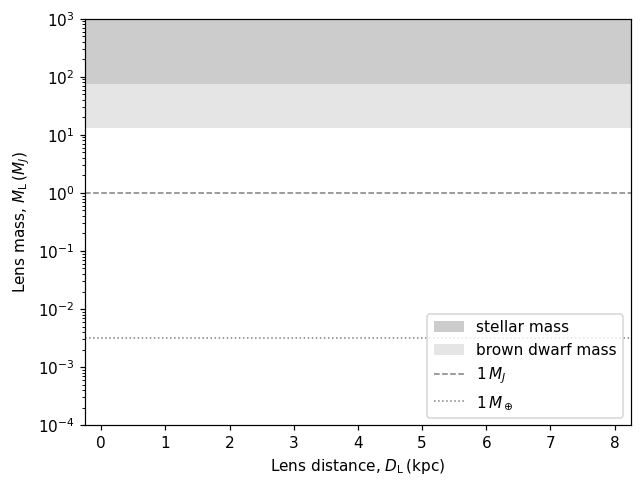

In [11]:
def MfromthetaE(theta_E: Union[np.ndarray, float], DL: Union[np.ndarray, float], 
                DS: Union[np.ndarray, float] = 8.0) -> Union[np.ndarray, float]:
    """
    Calculate the lens mass, M.
    
    Parameters
    ----------
    theta_E : np.ndarray or float
        Micro arc seconds.
    DL : np.ndarray or float
        Distance to the lens in kpc.
    DS : np.ndarray or float, optional
        Distance to the source in kpc (default is 8.0, the distance to the Galactic center).
    
    Returns
    -------
    M : np.ndarray or float
        Lens mass in Jupiter masses, same shape as theta_E.
    
    Notes
    -----
    The lens mass is calculated using the formula:
    
    .. math::
        M = \frac{\theta_E^2}{\kappa \pi_{rel}}
    
    where
    
    .. math::
        \kappa = 8.144 \, \text{mas}/M_\odot
    
    and
    
    .. math::
        \pi_{rel} = \text{au} \left( \frac{1}{D_L} - \frac{1}{D_S} \right)
    
    Here, au indicates that we are working in parsec distances and angles, because by definition, 
    1 parsec is the distance to an object with a parallax angle of 1 arc second.
    
    .. math::
        d = \frac{1}{p}
    
    where d is the distance to the star in parsecs (1 pc = 3.26 light-years) and p is the parallax angle in arc seconds.
    
    Note: $M_\odot = 1047.57 M_J$ according to Google.
    """

    # Constants
    KAPPA = 8.144  # mas/MS
    MS_MJ = 1047.57 # mass of the sun in jupiter masses (MJ)
    KAPPA_MUMJ = KAPPA*1000/MS_MJ  # muas/MJ
    #au = 0.000484814  #kpc
    #rad_deg = 1.0*180.0/np.pi  # 1 radian in degrees
    #deg_as = 1.0*60.0*60.0  # 1 deg in mas
    AS_MUAS = 1.0*1000000.0  # 1 as in muas
    #rad_muas = rad_deg*deg_as*as_muas  # 1 rad in muas

    #pirel_rad = au*(1.0/DL-1.0/DS)  # DL, DS and au are all in kpc. pi is in rad (small angle appeoximation)
    #pirel_muas = pirel_rad*rad_muas  # converting units to muas
    pirel_as = (1./(DL*1000)-1.0/(DS*1000))
    pirel_muas = pirel_as*AS_MUAS
    M = theta_E**2/(KAPPA_MUMJ*pirel_muas)  # M in Jupiter masses

    return M


# x values
D_L = np.linspace(0.01,7.99,799)

# plot stuff
plt.close(6)
plt.figure(num=6, dpi=110)
xmin, xmax = -0.25, 8.25

# Annotation arrays
plot_x = np.linspace(xmin,xmax,150)
plot_y_J = np.ones_like(plot_x)
plot_y_BD = plot_y_J*13.0
plot_y_DF = plot_y_J*75.0
plot_y_E = plot_y_J*0.00314558

######################
# your code goes here

######################

# Background fill
plt.fill_between(plot_x, plot_y_DF, 10**3, 
                 color='k', alpha=0.2, ec=None, 
                 label='stellar mass')
plt.fill_between(plot_x, plot_y_BD, plot_y_DF, 
                 color='grey', alpha=0.2, ec=None, 
                 label='brown dwarf mass') #, hatch='*'

# Reference mass lines
plt.axhline(1, 
            color='grey', 
            linestyle='dashed', 
            linewidth=1, 
            label=r'$1\,M_J$')
plt.axhline(0.00314558, 
            color='grey', 
            linestyle='dotted', 
            linewidth=1, 
            label=r'$1\,M_\oplus$')

# plot stuff
plt.xlabel(r'Lens distance, $D_{\rm L}\, ({\rm kpc})$')
plt.ylabel(r'Lens mass, $M_{\rm L}\, (M_J$)')
plt.yscale('log')
plt.xlim((xmin, xmax))
plt.ylim((10**-4, 10**3))
plt.legend(loc='lower right')
plt.show()

## Brown dwarfs
Events with $\theta_{\rm E} past the upper end of the Einstein desert belong in the realm of brown dwarfs. A brown dwarf is a sort of hybrid object, which is usually distinguished as being more massive than a planet and less massive than a star. They are sometimes referred to as failed stars, although this implies knowledge of their formation method that is possibly unfounded. The distinguishing feature of a brown dwarf is that, unlike gas giant planets, they can fuse deuterium in their cores. The lower mass limit for a brown dwarf is frequently quoted in the literature as $13\,M_{\rm J}$ (see [BDcomp.csv](./Data/Events/BD/BDcomp.csv), [BDhost.csv](./Data/Events/BD/BDhost.csv), [BDSL.csv](./Data/Events/BD/BDSL.csv), [FFP.csv](./Data/Events/FFP.csv) and references therein); the approximate mass at which deuterium fusion is typically possible. 

> <i>[This talk, by Jackie Faherty](https://www.youtube.com/watch?v=Qqd_VTGZNb8), provides a fantastic discussion on the importance of brown dwarfs and the complicated overlap between brown dwarfs and exoplanets, if you have a spare hour and a quarter.</i>

The upper mass limit is also vague. Brown dwarfs are distinguished from stars by the lack of *sustained* hydrogen fusion in their cores. This distinction does not require a lack of hydrogen fusion, but a lack of hydrogen fusion after the additional heat created during formation has worn off. The mass at which this occurs varies widely depending on metalicity. $75\,M_{\rm J}$ is a boundary regularly used in the microlensing literature (see [BDcomp.csv](./Data/Events/BD/BDcomp.csv), [BDhost.csv](./Data/Events/BD/BDhost.csv), [BDSL.csv](./Data/Events/BD/BDSL.csv) and references therein), although this boundary is potentially anywhere from $70-95\,M_{\rm J}$, depending on metallicity ([Dieterich et al., 2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...865...28D); [Chabrier & Baraffe, 1997](https://ui.adsabs.harvard.edu/abs/1997A&A...327.1039C); [Forbes & Loeb, 2019](https://ui.adsabs.harvard.edu/abs/2019ApJ...871..227F)). 

### Brown dwarf observations and microlensing discoveries
Microlensing has been used to discover a number of brown dwarfs in the form of singles lens events, as companions to stellar-type hosts, in brown-dwarf binaries, and as hosts to planetary companions. The first of these was the single-lens brown-dwarf event OGLE-2007-BLG-224 ([Gould et al., 2009](https://ui.adsabs.harvard.edu/abs/2009ApJ...698L.147G)), which was verified, through non-detection, with high-resolution, adaptive-optics (AO)<sup>*<sub>7</sub></sup> follow up in [Shan et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...908..240). The microlensing brown-dwarf discoveries are collated here, by type, in the `Data/Events/BD` subdirectory ([BDcomp.csv](./Data/Events/BD/BDcomp.csv), [BDhost.csv](./Data/Events/BD/BDhost.csv), [BDSL.csv](./Data/Events/BD/BDSL.csv)). These tables enforce broader mass limits on brown dwarfs (specifically, $13<M_{\rm J}<95$) than those used in [Chung et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...871..179C), which noted 34 microlensing brown-dwarf discoveries, at the time of publication.

> <sup>*<sub>7</sub></sup> <i>AO</i> is a technique used in ground-based astronomy where the telescope's mirror is adaptively deformed to counter atmospheric distortion.  

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/PlanetsE4.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 4</h2>
    </a>
    <p style="margin: 0 20px;">Make a data frame of brown dwarfs to populate the histogram of brown dwarf mass.</p>
    <br>
    <p style="margin: 0 20px;"> <i>Note. The brown dwarfs are mass 1 in the BDSL file (brown dwarf single lenses), mass 2 in the BDcomp file(brown dwarf companions), and mass 1 and sometimes mass 2 in the BDhost file (brown dwarf hosts).</i></p>
    <br>
</div>

Sanity checks:
-----------------
BD count (SL): 9.0
BD count (SL+comp): 36.0
BD count (SL+comp+hostm1): 57.0
BD count (SL+comp+host): 61.0


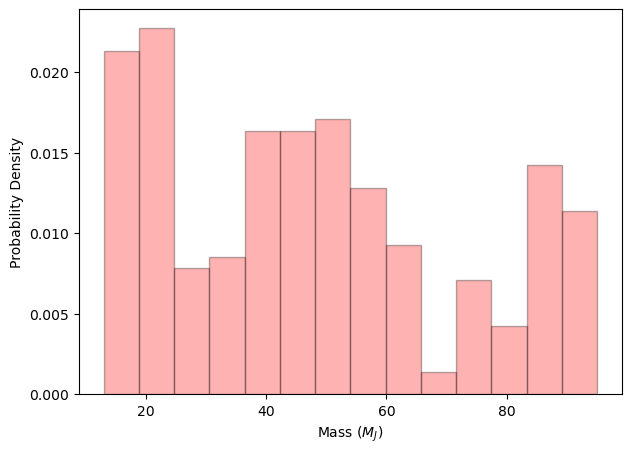

In [14]:
BD_SL_df = pd.read_csv('Data/Events/BD/BDSL.csv', header=0, skipinitialspace=True)  # brown dwarf single lens
BD_BLhost_df = pd.read_csv('Data/Events/BD/BDhost.csv', header=0, skipinitialspace=True)  # brown dwarf hosts, any companion 
BD_BLcomp_df = pd.read_csv('Data/Events/BD/BDcomp.csv', header=0, skipinitialspace=True)  # stellar hosts

# rename all the q columns
BD_SL_df.rename(columns={'# q': 'q'}, inplace=True)
BD_BLhost_df.rename(columns={'# q': 'q'}, inplace=True)
BD_BLcomp_df.rename(columns={'# q': 'q'}, inplace=True)

######################
# select the brown dwarfs
# ignore warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# single lens(q, m1_MSolar, P, theta_E_uas, eventID)
BD_df = BD_SL_df[['q', 'm1_MSolar', 'P', 'theta_E_uas', 'eventID']]
# make a column m_MJupiter
BD_df['m_MJ'] = BD_df['m1_MSolar'] * 1047.57
# drop the m1_MSolar column
BD_df.drop(columns=['m1_MSolar'], inplace=True)

print('Sanity checks:')
print('-----------------')
print('BD count (SL):', np.sum(BD_df['P']))

# add the BD companions (q, m1_MSolar, P, theta_E_uas, eventID)
BD_comp_copy = BD_BLcomp_df[['q', 'm2_MJ', 'P', 'theta_E_uas', 'eventID']]
# rename the m2_MJ column as m_MJ
BD_comp_copy.rename(columns={'m2_MJ': 'm_MJ'}, inplace=True)
# append the BD companions to the BD_df
BD_df = pd.concat([BD_df, BD_comp_copy], ignore_index=True)

print('BD count (SL+comp):', np.sum(BD_df['P']))

# add the BD hosts (q, m1_MSolar, P, theta_E_uas, eventID)
BD_host_copy = BD_BLhost_df[['q', 'm1_MSolar', 'P', 'theta_E_uas', 'eventID']]
BD_host_copy['m_MJ'] = BD_host_copy['m1_MSolar'] * 1047.57
BD_host_copy.drop(columns=['m1_MSolar'], inplace=True)
BD_df = pd.concat([BD_df, BD_host_copy], ignore_index=True)

print('BD count (SL+comp+hostm1):', np.sum(BD_df['P']))

# add the BD companions to BD hosts
# keep only those with m2_MJ > 13
BD_host_comp = BD_BLhost_df[BD_BLhost_df['m2_MJ'] > 13]
BD_host_comp['m_MJ'] = BD_host_comp['m2_MJ']
# keep only the columns mathcing BD_df
BD_df = pd.concat([BD_df, BD_host_comp[['q', 'm_MJ', 'P', 'theta_E_uas', 'eventID']]], ignore_index=True)

print('BD count (SL+comp+host):', np.sum(BD_df['P']))
######################

# Plotting
plt.close(100)
plt.figure(num=100, figsize=(7, 5))

#make a histogram of m_MJ
bins = np.linspace(13, 95, 15)
plt.hist(BD_df['m_MJ'], 
         bins=bins, 
         color='red', 
         edgecolor='black', 
         alpha=0.3, 
         label='All BDs', 
         weights=BD_df['P']/np.sum(BD_df['P']),
         density=True)

# Labels and title
plt.xlabel('Mass ($M_J$)')
plt.ylabel('Probability Density')

plt.show()


There are three peaks in this distribution. And while detection biases undoubtedly play a role in that, it is not the kind of bahaviour we expect from objects that all, theoretically, belong to the low-mass end of the "stellar" population. This strangeness is more obvious when we overlay some [initial mass functions](https://en.wikipedia.org/wiki/Initial_mass_function#Development) on our histogram. Although, we should keep in mind when doing this that, in this mass range, the microlensing detection efficiency is lower for lower mass objects. The overarching shape of the distribution will be affected by this bias. Also, ~61 objects<sup>*<sub>8</sub></sup> is not really enough for a smooth distribution, so these bumps may be nothing more than poissonian noise.

> <sup>*<sub>8</sub></sup> If <i>np.sum(BD_df['P']) != 61</i>, for you, take another look at your brown dwarf data frame.

Area under histogram: 0.9999999999999987


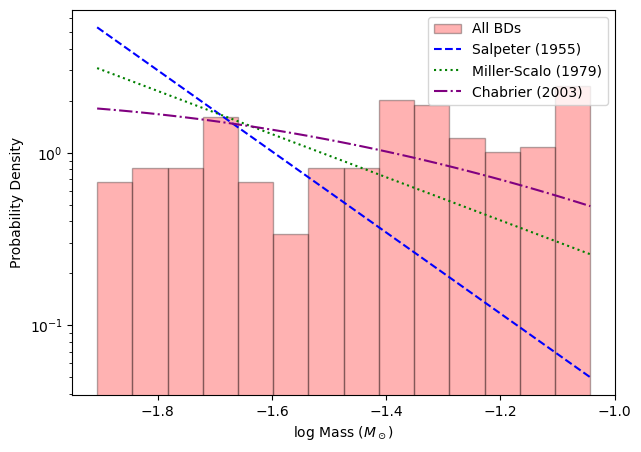

In [18]:
# Close any existing figure with number 100
plt.close(100)

# Create a new figure
plt.figure(num=100, figsize=(7, 5))

# Convert BD masses from Jupiter masses to solar masses
BD_df['m_Msun'] = BD_df['m_MJ'] / 1047.57

# Define the bins for the histogram (in log10 solar masses)
log_mass_min = np.log10(13 / 1047.57)  # Convert 13 M_J to solar masses
log_mass_max = np.log10(95 / 1047.57)  # Convert 95 M_J to solar masses
bins = np.linspace(log_mass_min, log_mass_max, 15)  # 15 bins in log10(M_sun)

# Plot the histogram of log10(m_Msun) with density=True to normalize the area to 1
hist_counts, bin_edges, _ = plt.hist(np.log10(BD_df['m_Msun']), 
                                     bins=bins, 
                                     color='red', 
                                     edgecolor='black', 
                                     alpha=0.3, 
                                     label='All BDs', 
                                     weights=BD_df['P'], 
                                     density=True)  # Normalize the histogram to sum to 1

# Calculate the bin width
bin_width = bin_edges[1] - bin_edges[0]

# Verify that the area under the histogram sums to 1
hist_area = np.sum(hist_counts * bin_width)
print(f"Area under histogram: {hist_area}")  # Should be very close to 1

def salpeter_mass_function(log_mass: Union[float, np.ndarray], normalization: Optional[float] = 1) -> Union[float, np.ndarray]:
    """
    Compute the Salpeter (1955) mass function.

    Parameters
    ----------
    log_mass : float or np.ndarray
        The log10 of the mass (in solar masses).
    normalization : float, optional
        Scaling factor to match the histogram. Default is 1.

    Returns
    -------
    float or np.ndarray
        The value of the Salpeter mass function at the given mass(es).
    """
    mass = 10**log_mass  # Convert log10(mass) back to linear scale
    return normalization * mass**(-2.35)

def miller_scalo_mass_function(log_mass: Union[float, np.ndarray], normalization: Optional[float] = 1) -> Union[float, np.ndarray]:
    """
    Compute the Miller-Scalo (1979) mass function for M < 1 M⊙.

    Parameters
    ----------
    log_mass : float or np.ndarray
        The log10 of the mass (in solar masses).
    normalization : float, optional
        Scaling factor to match the histogram. Default is 1.

    Returns
    -------
    float or np.ndarray
        The value of the Miller-Scalo mass function at the given mass(es).
    """
    mass = 10**log_mass  # Convert log10(mass) back to linear scale
    return normalization * mass**(-1.25)  

def chabrier_mass_function(log_mass: Union[float, np.ndarray], normalization: Optional[float] = 1) -> Union[float, np.ndarray]:
    """
    Compute the Chabrier (2003) IMF (log-normal for M < 1 M⊙).

    Parameters
    ----------
    log_mass : float or np.ndarray
        The log10 of the mass (in solar masses).
    normalization : float, optional
        Scaling factor to match the histogram. Default is 1.

    Returns
    -------
    float or np.ndarray
        The value of the Chabrier IMF at the given mass(es).
    """
    mass = 10**log_mass  # Convert log10(mass) back to linear scale
    M_c = 0.08  # Characteristic mass (in solar masses)
    sigma = 0.69  # Width of the log-normal distribution
    return normalization * (1 / mass) * np.exp(-(log_mass - np.log10(M_c))**2 / (2 * sigma**2))

# Generate a range of log10(mass) values for plotting the functions (in solar masses)
log_mass_values = np.linspace(log_mass_min, log_mass_max, 100)

# Normalize the Salpeter, Miller-Scalo, and Chabrier functions so that their integrals (area under the curve) sum to 1
# Compute the bin width for numerical integration
salpeter_values = salpeter_mass_function(log_mass_values)
salpeter_integral = np.sum(salpeter_values) * (log_mass_values[1] - log_mass_values[0])
salpeter_normalized = salpeter_values / salpeter_integral

miller_scalo_values = miller_scalo_mass_function(log_mass_values)
miller_scalo_integral = np.sum(miller_scalo_values) * (log_mass_values[1] - log_mass_values[0])
miller_scalo_normalized = miller_scalo_values / miller_scalo_integral

chabrier_values = chabrier_mass_function(log_mass_values)
chabrier_integral = np.sum(chabrier_values) * (log_mass_values[1] - log_mass_values[0])
chabrier_normalized = chabrier_values / chabrier_integral

# Plot the normalized Salpeter mass function
plt.plot(log_mass_values, 
         salpeter_normalized, 
         color='blue', 
         linestyle='--', 
         label='Salpeter (1955)')

# Plot the normalized Miller-Scalo mass function
plt.plot(log_mass_values, 
         miller_scalo_normalized, 
         color='green', 
         linestyle=':', 
         label='Miller-Scalo (1979)')

# Plot the normalized Chabrier (2003) IMF
plt.plot(log_mass_values, 
         chabrier_normalized, 
         color='purple', 
         linestyle='-.', 
         label='Chabrier (2003)')

# Set y-axis to log scale
ax = plt.gca()
ax.set_yscale('log')

# Labels and title
plt.xlabel('log Mass ($M_\odot$)')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()


<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/PlanetsE5.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 5</h2>
    </a>
    <p style="margin: 0 20px;">Make a plot of event year vs. mass and another of year vs. mass ratio. What does this plot tell us about our selection biases for microlensing brown dwarfs</p>
    <br>
    <p style="margin: 0 20px;"><i>Note. The single lens events have all been given a mass ratio of 1.</i></p>
    <br>
</div>

4     OGLE-2017-BLG-0896
42    OGLE-2016-BLG-1195
63      MOA-2016-BLG-231
64    OGLE-2017-BLG-1038
70    OGLE-2017-BLG-1038
Name: eventID, dtype: object 4     2017
42    2016
63    2016
64    2017
70    2017
Name: year, dtype: int64 4     17.808690
42    83.805600
63    20.951400
64    22.522755
70    13.300000
Name: m_MJ, dtype: float64 4     1.00000
42    0.00005
63    0.42600
64    0.61000
70    0.61000
Name: q, dtype: float64
56    OGLE-2012-BLG-0358
62     OGLE-2009-BLG-151
65    OGLE-2016-BLG-1266
Name: eventID, dtype: object 56    2012
62    2009
65    2016
Name: year, dtype: int64 56    23.04654
62    18.85626
65    15.71355
Name: m_MJ, dtype: float64 56    0.080
62    0.419
65    0.760
Name: q, dtype: float64


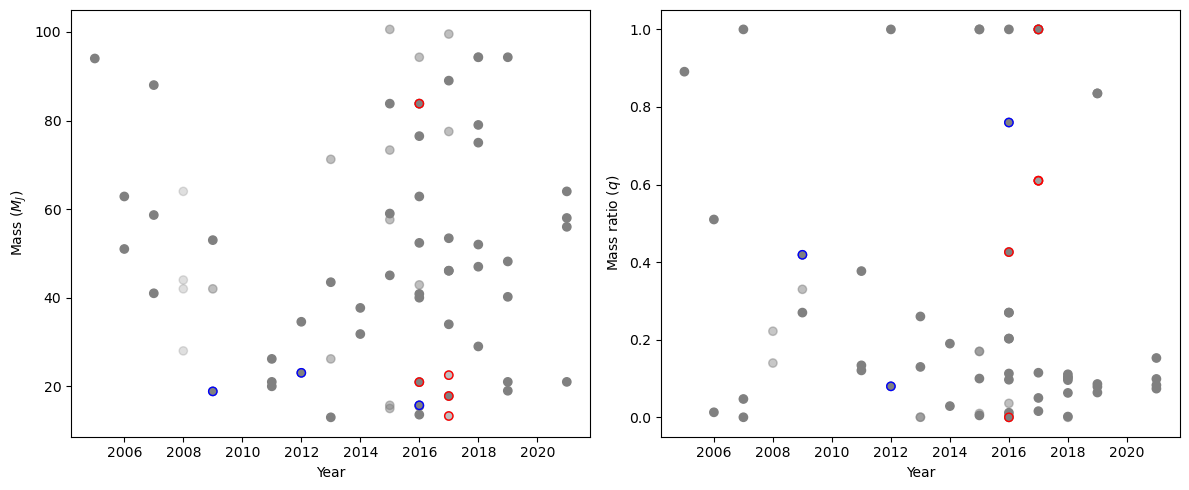

In [ ]:
plt.close(5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), num=5)

######################
# your code goes here

# Exercise 5

# Exercise 6

######################

# Add labels and title for the first subplot
ax1.set_xlabel('Year')
#ax1.set_yscale('log')
ax1.set_ylabel('Mass ($M_J$)')

#ax2.set_yscale('log')
ax2.set_xlabel('Year')
ax2.set_ylabel('Mass ratio ($q$)')

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

The 2008-2014 events appear to be missing events in the 50-95 $M_{J}$ range, and aside from the a few events (driven by Spitzer parallax measurements between 2016 and 2019) The mass ratio of these brown dwarf events is progressively lowering. This is largely due to the collection of papers, lead by Han, which are specifically searching for brown-dwarf companions with $q<0.2$. All evidence points towards an incomplete sample of brown dwarf microlensing events. Also of note, OGLE was not operating for some or all of 2009, 2010, 2020, and 2021.

The microlensing brown-dwarf events, for which the full physical solution is known, show an unexpectedly high proportion with strange kinematics (e.g., [Chung et al., 2019](https://ui.adsabs.harvard.edu/abs/2019ApJ...871..179C), [Shvartzvald et al., 2017](https://ui.adsabs.harvard.edu/abs/2017ApJ...840L...3S), [Shvartzvald et al., 2019](https://ui.adsabs.harvard.edu/abs/2019AJ....157..106S), and [Malpas et al., 2022](https://ui.adsabs.harvard.edu/abs/2022AJ....164..102M)) and unexpectedly low-mass binaries (e.g., [Albrow et al., 2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...858..107A), [Choi et al., 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...768..129C) and [Han et al., 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...778...38H); with secondaires below the planet/brown-dwarf cut off).

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/PlanetsE6.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 6</h2>
    </a>
    <p style="margin: 0 20px;">Indicate these "strange" events on the Exercise 5 plot.</p>
    <br>
</div>


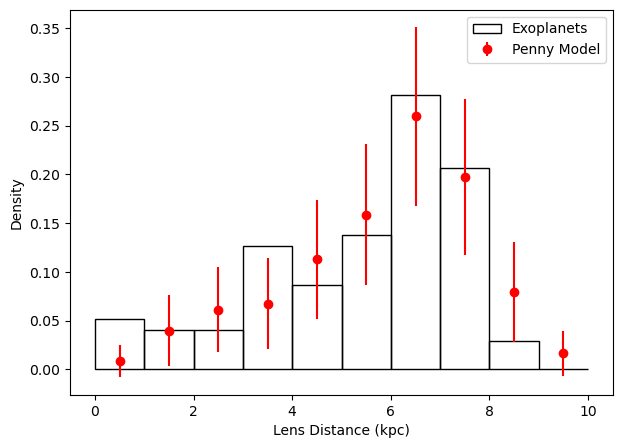

In [ ]:
# dev note: move this exercies to dev only
# dev note : add the theta E value to the tables
# Exercise x: Assuming all events have source distances of 8 kpc, make a histogram of the 
# distribution of lens distances for all microlensing events containing brown dwarfs.

def calc_DL(M: Union[np.ndarray, float], theta_E: Union[np.ndarray, float], 
            DS: Union[np.ndarray, float] = 8.0) -> Union[np.ndarray, float]:
    """
    Calculate the lens distance, DL in kpc.

    Parameters
    ----------
    M : np.ndarray or float
        Solar masses.
    theta_E : np.ndarray or float
        Micro arc seconds.
    DS : np.ndarray or float, optional
        Distance to the source in kpc (default is 8.0, the approximate distance to the Galactic center).
    
    Returns
    -------
    DL : np.ndarray or float
        Lens distance in kpc, same shape as theta_E.
    
    Notes
    -----
    The lens distance is calculated using the formula:
    
    .. math::
        D_L = \frac{1}{\frac{1}{D_S} - \frac{\theta_E}{\kappa M}}
    
    where
    
    .. math::
        \kappa = 8.144 \, \text{mas}/M_\odot
    """

    # Constants
    kappa = 8.144  # mas/MS
    DL = 1.0/(1.0/DS - theta_E/(kappa*M))  # DL in kpc
    return DL

# Plot stuff
plt.close(7)
plt.figure(num=7, figsize=(7, 5))

# Histogram stuff
bins = np.linspace(0, 10, 11)

# BD data
'''
BD_SL_df = pd.read_csv('Data/filename.csv', header=0, skipinitialspace=True)
BD_BLhost_df = pd.read_csv('Data/filename.csv', header=0, skipinitialspace=True)
BD_BLcomp_df = pd.read_csv('Data/filename.csv', header=0, skipinitialspace=True)

M = BD_df['M'] # Jupiter masses
M_solar = M * 317.8  # Solar masses
theta_E = BD_df['theta_E']  # muas
DL = calc_DL(M_solar,theta_E)  # kpc
weights = BD_df['P'] # crude solution probabilities #'''

# BD df


######################
# BD histogram
'''
plt.hist(DL, 
         bins=bins, 
         color='grey', 
         edgecolor='black', 
         alpha=0.3, 
         density=True, 
         label='BD Solutions', 
         weights=weights) #'''
######################

# exoplanet histogram using data frames from exercise 4
default_hist, _ = np.histogram(microlensing_df_default['sy_dist_kpc'], 
                               bins=bins, 
                               density=True)
plt.hist(microlensing_df_default['sy_dist_kpc'], 
         bins=bins, 
         facecolor='none', 
         edgecolor='black', 
         alpha=1.0, 
         density=True, 
         label='Exoplanets')

# Adding Penny errorbars
penny_model_df = pd.read_csv('Data/Penny2016F1-model.csv', header=0, skipinitialspace=True)
normalise = penny_model_df['f'].sum()
plt.errorbar(penny_model_df['D_L'], 
             penny_model_df['f']/normalise, 
             yerr=penny_model_df['f_err']/normalise, 
             fmt='o', color='red', 
             label='Penny Model')

# Labels and title
plt.xlabel('Lens Distance (kpc)')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

### Two different formation groups?
The mass overlap between obvious planets and seemingly stellar binaries raises the question as to whether there are two formation methods in play in the low-mass brown-dwarf or high-mass planetary regimes. Exactly how low does the stellar mass function go, and how high does the planetary mass function go? If there are two formation methods, how might we tell these individual objects apart; is there a microlensing proxy for formation method? 
            
A distinguishing microlensing event parameter used to identify likely planetary binary-lens events is the mass ratio, $q$.  Ignoring brown-dwarf hosts and using the traditional planetary distinction ($M_{planet}<13\,M_{\rm J}$), one can define an upper limit in $q$ for planetary events of 
    $$q_{max}=\frac{M_{\rm dueterium\, fusion}}{M_{\rm hydrogen\, fusion}}=\frac{13\, M_{\rm J}}{95\,M_{\rm J}}=0.137.$$
Therefore, we can concentrate our investigations on $q\lesssim0.14$ events when specifically searching for clear exoplanet events. There is no tidy distinction, when we also consider possible brown-dwarf hosts.  The [IAU working definition of an exoplanet](https://ui.adsabs.harvard.edu/abs/2022NewAR..9401641L) has recently been expanded to include a soft upper limit in mass ratio of $q\simeq0.04$ for companions around brown-dwarf, stellar, and remnant hosts, but still requiring a mass below $13\,M_{\rm J}$.

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/PlanetsE7.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 7</h2>
    </a>
    <p style="margin: 0 20px;">What does the mass ratio distribution of microlensing brown dwarfs (hosts and companions) look like compared to exoplanets? Show your answer using the plot below</p>
    <br>
    <p style="margin: 0 20px;"><i>Note. you can find the exoplanet column names and details in <a href="./Data/./Data/microlensing-column-mapping.pdf">this document</a> (./Data/microlensing-column-mapping.pdf).</i></p>
    <br>
</div>

In [ ]:
# if you are working in chrome or firefox, you can use this to view the PDF

# load PDF class from the PDF module inside ../Modules/
import sys
sys.path.append('../Modules')  # add the Modules folder to path
from PDF import PDF
  
PDF('./Data/microlensing-column-mapping.pdf', size=(560, 800))

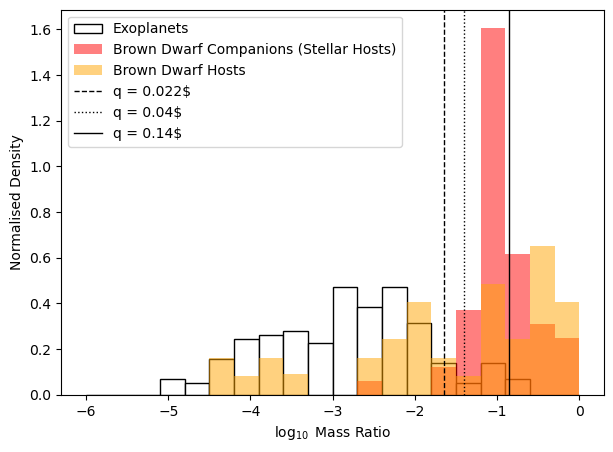

In [ ]:
plt.close(8)
plt.figure(num=8, figsize=(7, 5))

######################
# Your code goes here

######################

# vline at q=0.022 (log10q=-1.65)
plt.axvline(-1.65, 
            color='black', 
            linestyle='dashed', 
            linewidth=1, 
            label=r'q = 0.022$')

plt.axvline(np.log10(0.04), 
            color='black', 
            linestyle='dotted', 
            linewidth=1, 
            label=r'q = 0.04$')

plt.axvline(np.log10(0.14), 
            color='black', 
            linestyle='solid', 
            linewidth=1, 
            label=r'q = 0.14$')

plt.xlabel(r'$\log_{10}$ Mass Ratio')
plt.ylabel('Normalised Density')
plt.legend()

> <i>Did your get $q$ values from the NEA right? Your distributions should span from around -5 to 0 in log space.</i>

We could look at the exoplanet distribution and the brown dwarf companion distribution, squint a bit, and believe that they are gaussian-like, and resolutely different populations; the brown dwarfs are clearly part of a binary "star" population and not some sort of oversized planets. The brown dwarf host systems have members in both populations. Some of them look like they belong to the binary population, but the lower end of the mass ratio distribution shadows the exoplanets' distribution,  spanning a similar range, but with a derth at $q=0.001$ ($\log_{10}q=-3$). It could be that this is another case where microlensing degeneracies cause artefacts in the distribution, but what does the real distribution look like?


As a thought experiment, we could propose a mass ratio distinction of $q_{thresh}=0.022$, matching the observed dip in $q$ from Exercise 5, and consider the implications for our current portfolios of brown-dwarf- and exoplanet- inclusive events. For this example, we assume lenses with $q>q_{thresh}$ belong wholly to the stellar population, while lenses with $q<q_{thresh}$ include one stellar member and one planetary member. Though this is merely a thought experiment, it is not inconsistent with the findings of [Suzuki et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...833..145S) for planetary lenses (see their Figure 13), nor with the observed mass ratio function for binary stars (e.g., [Sapozhnikov et al., 2020](https://ui.adsabs.harvard.edu/abs/2020ARep...64..756S), Figure 7). A universal $q=0.022$ cut-off would group all but one of the microlensing binaries, containing a stellar host and brown-dwarf companion, as stellar-stellar lenses. The last event left standing is OGLE-2015-BLG-0693 with a mass ratio of $q=0.019\pm0.015$, well within $1\sigma$ of our hypothetical cut-off. In which case, the implication would be that we are yet to conclusively find a brown-dwarf-mass object as a "planetary" companion, as expected from the mass cutoff. This same cut off, applied to brown-dwarf host events, is less consistent with the mass cutoff. There are nine events for which $q>q_{thresh}$, but which also have a companion mass lower than the deuterium fusion limit ($m_2<13M_{\rm J}$); the mass of these companions would conflict with a $q$-based distinction of "planet." 
                
Meanwhile, applying the same cut-off to the solutions presented in the NASA Exoplanet Archive, decisively yields stellar-planetary characterisations for a large proportion of the presented solutions (see Figure 9). This is somewhat by design, as contributors often search specifically for low-$q$ events when looking for exoplanets.

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/PlanetsE8.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 8</h2>
    </a>
    <p style="margin: 0 20px;">A comparison of exoplanet and brown-dwarf event component masses and reference mass thresholds is shown in the Figure below (Figure 9). Annotate some theoretical mass-ratio thresholds onto the figure; q<sub>thresh</sub>=(0.14, 0.04, 0.02).</p>
    <br>
    <p style="margin: 0 20px;"><i>Note. Brown-dwarf companion solutions are shown in blue and brown-dwarf host solutions in purple and the Nasa Exoplanet Archive events are black crosses. The opacity of the samples is meant to represent relative probability of degenerate solutions where less probable solution are more opaque. q>1 means the primary and secondary have been defined in reverse. q above 0.14 is resolutely stellar, by the classical definition</p>
    <br>
</div>

In [ ]:
# Fetch data from the ML table in NASA Exoplanet Archive using astroquery
query = NasaExoplanetArchive.query_criteria(table="ML", select="pl_name,ml_modeldef,pl_massj,st_mass")
ML_df = query.to_pandas()
ML_df = ML_df.dropna(subset=['pl_massj', 'st_mass', 'ml_modeldef']).copy()
#ML_df = ML_df[ML_df['ml_modeldef'] == 1]  # to keep just the default models
ML_df.rename(columns={'pl_massj': 'm2_MJ', 'st_mass': 'm1_MS'}, inplace=True)
ML_df['m1_MJ'] = ML_df['m1_MS'] * 1047.57


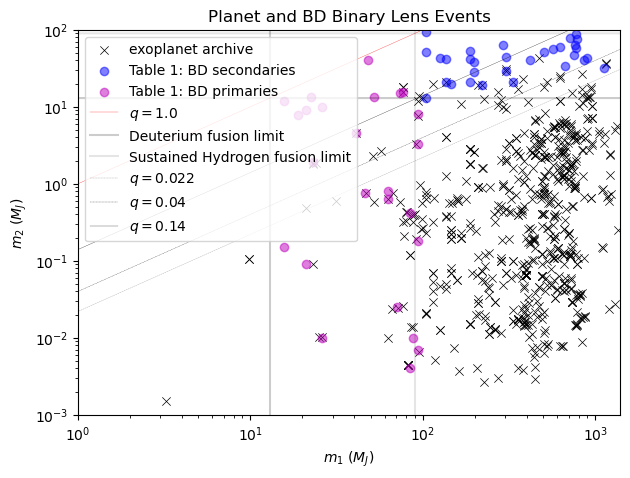

In [ ]:
plt.close(9)
plt.figure(num=9, figsize=(7, 5))

# Plot m1 vs m2
plt.scatter(ML_df['m1_MJ'], 
            ML_df['m2_MJ'], 
            color='k', 
            marker='x', 
            lw=0.5, 
            label='exoplanet archive'
            )

BD_BLcomp_df['m1_MJ'] = BD_BLcomp_df['m1_MSolar'] * 1047.57
BD_BLhost_df['m1_MJ'] = BD_BLhost_df['m1_MSolar'] * 1047.57

plt.scatter(BD_BLcomp_df['m1_MJ'], 
            BD_BLcomp_df['m2_MJ'], 
            color='b', 
            label="Table 1: BD secondaries", 
            alpha=0.5
            )
plt.scatter(BD_BLhost_df['m1_MJ'], 
            BD_BLhost_df['m2_MJ'], 
            color='m', 
            label="Table 1: BD primaries", 
            alpha=0.5)

# Annotations
x = np.linspace(0.1, 1400., 1400)
y = x * 1.0
plt.plot(x, y, 'r-', lw=0.2, label=r'$q=1.0$')
y = x * 0. + 13.0
plt.plot(x,y,'k-', alpha=0.2, label='Deuterium fusion limit')
y = x * 0. + 90.0
plt.plot(x, y, 'k-', alpha=0.1, label='Sustained Hydrogen fusion limit')
y = np.linspace(0.001, 1000., 1000)
x = y * 0. + 13.0
plt.plot(x, y, 'k-', alpha=0.2)
x = y * 0. + 90.0
plt.plot(x, y, 'k-', alpha=0.1)

######################
# Your code goes here

######################

plt.xlabel(r'$m_1$ ($M_J$)')
plt.ylabel(r'$m_2$ ($M_J$)')
plt.title('Planet and BD Binary Lens Events')
plt.xlim((1, 1400))
plt.ylim((0.001,100.))
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper left')

plt.show()

While a mass-ratio threshold appears more convincing than the mass threshold, the "best" value for this threshold is arguable, and grounds for differentiating the populations this way are not obvious, visually.

We could also take the radical approach of considering that there is no firm distinction between stars and planets and that we are arguing for a binary mindset in a single population whose differences are on a continuum; maybe this whole exercise is one of taxonomy for the sake of taxonomy.

It is worth noting that the characterisations of these events, which we are using to interpret the limitations of our Galactic model, are quite often inferred by employing the very same models. This is somewhat circular logic, and though this exercise may prove enlightening, it is by no means conclusive. Besides which, regularly inferring from a model in this way will have the effect of buffing away the edge cases, by avoiding truths that correspond to perfectly plausible physical solutions that are not the most probable ones. 

The existence of brown dwarfs in binaries with members below the $13\, M_{\rm J}$ limit and $q$ above the classical, planetary, upper-$q$ cut-off (OGLE-2011-BLG-0420 and OGLE-2009-BLG-151, [Choi et al., 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...768..129C); MOA-2016-BLG-231, [Chung et al., 2019](https://ui.adsabs.harvard.edu/abs/2019ApJ...871..179C); OGLE-2016-BLG-1266, [Albrow et al., 2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...858..107A)) seems to imply that these objects can form like stars at masses below $13\, M_{\rm J}$. Potentially, that is the case with free-floating, Jupiter-mass planets (e.g., OGLE-2016-BLG-1540, [Mroz et al., 2018](https://ui.adsabs.harvard.edu/abs/2018AJ....155..121M)). This is supported by simulations that predict that it is low-mass (i.e., terrestrial) planets that are most likely to be dynamically ejected (e.g. [Ma et al., 2016](https://ui.adsabs.harvard.edu/abs/2016MNRAS.461L.107M)), and that stellar formation processes may be valid down to $1-4\, M_{\rm J}$ ([Boyd & Whitworth, 2005](https://ui.adsabs.harvard.edu/abs/2005A&A...430.1059B); [Whitworth & Stamatellos](https://ui.adsabs.harvard.edu/abs/2006A&A...458..817W)).

It is also worth noting that the mass estimates of FFPs all make sweeping generalisations to infer mass. While they are very likely of classical planetary mass, it is often less clear if they belong to a population of disk FFPs in the $M_\oplus$ regime or bulge FFPs in the $M_{\rm J}$ regime. Some FFP events have kinematics that allow for an argument of one over the other (i.e., a bulge lens over a disk lens or vice versa). Even then, the masses for this population are generally given with a condition on the use of an estimated relative parallax of the lens and source ($\pi_{\rm rel}$).
        

### Counter-rotators and their implications for the mass function
The brown-dwarf population also plays host to a group of kinematic oddities; [Chung et al., (2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...871..179C), [Shvartzvald et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019AJ....157..106S), [Shvartzvald et al. (2017)](https://ui.adsabs.harvard.edu/abs/2017ApJ...840L...3S), and [Malpas et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022AJ....164..102M). These strange objects are important for a number of reasons. Firstly, they may point to a systemic misdiagnosis of the physical properties of the lens. These events are all reliant on parallax measurements made using the *Spitzer* space telescope to break the mass-distance degeneracy, so one obvious explanation for their obscurity is that the measurements themselves are faulty, as proposed in [Koshimoto & Bennett (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....160..177K). This proposal could, in theory, be supported by AO follow-up in disagreement with a questionable-*Spitzer*-measurement lens interpretation. To date, there have been no such follow-up interpretations *conclusively* in opposition to *Spitzer*-based interpretations.
 
Further evidence to support these unexpected kinematic results would allow us to explore more creative and interesting explanations for their existence. Given how difficult brown dwarfs are to observe, our expectations for this population are often extrapolations of the observed characteristic of more luminous stellar populations. The implications from the perspective of a Galactic model could come in many forms. For example: there is a missing mass dependence in the density profile or velocity dispersion, or the very-low-mass, non-luminous end of the mass function has been dramatically underestimated and, as a result, we may also be underestimating our luminosity-to-mass inferences on a cosmological scale.

## Next Steps

FFPs and single-lens brown dwarfs occupy the short-event end (low-$t_{\rm E}$, or low-$\theta_{\rm E}$) of microlensing sensitivity. This sensitivity is challenged again at the long-event end (high-$t_{\rm E}$, or high-$\theta_{\rm E}$) by another dim lens in the form of black holes. On that note, the next notebook we recommend is part 3 in this series: the [Remnants and Dark Matter](RemnantsAndDarkMatter.ipynb) noteboook, to give you a fuller picture when it comes to uses for the microlensing method.

Otherwise, [Eras](Eras.ipynb) provides you with an overviwew of the history of microlensing, how observing strategies have changed, and how they will likely evolve further in the future.

If you would like to start getting your hands dirty with some actual data, try the [Single Lens](SingleLens.ipynb) notebook next.